In [1]:
import pandas as pd
csv_file_name = "JAK1_v2.csv"
sample_data = pd.read_csv(csv_file_name,sep=",")

X_data = sample_data.iloc[:,1:-1]
y_data = sample_data.iloc[:,-1:]

In [2]:
X_data.shape

(51, 1444)

In [3]:
y_data.shape

(51, 1)

In [4]:
import pyqsar

In [5]:
from pyqsar import data_tools as dt

In [6]:
X_data.shape

(51, 1444)

In [7]:
X_data = dt.rm_empty_feature(X_data)

In [8]:
X_data.shape

(51, 1068)

In [9]:
X_data = dt.rmNaN(X_data)

In [10]:
X_data.shape

(51, 1001)

In [12]:
%matplotlib inline
dt.ScatterMatrix(X_data)

U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdTZWxlY3RlZCBGZWF0dXJlczonLCBvcHRpb25zPSgnYXBvbCcsICduYUFyb21BdG9tJywgJ25Bcm9tQm9uZCcsICduQXRvbScsICduSGVhdnnigKY=


C:\Users\CBBL\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Button(description=u'Get scatter matrix', style=ButtonStyle())

<pyqsar.data_tools.ScatterMatrix instance at 0x0000000008FEAA88>

In [13]:
from sklearn.preprocessing import MinMaxScaler
header = list(X_data.columns.values)
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data_scaled, columns=header)

In [14]:
X_data.head()

,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,nN,nO,nF,...,MW,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,Zagreb
0,0.276804,0.0,0.0,0.384615,0.166667,0.555556,0.2,0.5,0.0,0.0,...,0.198139,0.093682,0.188604,0.681062,0.341191,0.052116,0.503382,0.105144,0.1875,0.055556
1,0.563043,0.0,0.0,0.692308,0.500000,0.777778,0.4,0.5,0.5,0.0,...,0.527857,0.132686,0.488891,0.435982,0.636138,0.493462,0.504325,0.447806,0.4375,0.333333
2,0.504113,0.0,0.0,0.615385,0.333333,0.777778,0.4,0.5,0.0,0.0,...,0.352125,0.007858,0.343997,0.616634,0.387744,0.075312,0.554442,0.264750,0.2500,0.166667
3,0.790353,0.0,0.0,0.923077,0.666667,1.000000,0.6,0.5,0.5,0.0,...,0.681843,0.050697,0.644284,0.384449,0.682692,0.516658,0.555385,0.630862,0.5000,0.444444
4,0.860744,0.0,0.0,0.923077,0.666667,1.000000,0.8,0.5,0.0,0.0,...,0.637952,0.000000,0.676669,0.744326,0.420561,0.091241,0.590897,0.625567,0.3750,0.611111


In [15]:
from pyqsar import clustering as cl
cl.cophenetic(X_data)

average linkage cophenet: 0.7348908625755769
complete linkage cophenet: 0.6821872033187483
single linkage cophenet: 0.2735080743723878


In [16]:
clust = cl.FeatureCluster(X_data, 'average', 3)
clust_info = clust.set_cluster()


Cluster 1 ['nH'] 
Cluster 2 ['CIC0'] 
Cluster 3 ['nHCsats'] 
Cluster 4 ['SHCsats'] 
Cluster 5 ['ETA_EtaP'] 
Cluster 6 ['ETA_Eta_L'] 
Cluster 7 ['HybRatio'] 
Cluster 8 ['VE2_Dzp', 'VE3_Dzp', 'VE1_Dzp'] 
Cluster 9 ['ZMIC1'] 
Cluster 10 ['MLogP'] 
Cluster 11 ['SpMax5_Bhp', 'SpMax5_Bhv'] 
Cluster 12 ['SpMax5_Bhi', 'SpMax5_Bhe'] 
Cluster 13 ['minHBint4'] 
Cluster 14 ['nT6Ring', 'n6Ring'] 
Cluster 15 ['VE3_D', 'VE2_D'] 
Cluster 16 ['VE1_Dzv', 'VE2_Dzv', 'VE3_Dzv'] 
Cluster 17 ['hmin'] 
Cluster 18 ['VE1_D'] 
Cluster 19 ['SpMax6_Bhp', 'SpMax6_Bhv'] 
Cluster 20 ['SpMax8_Bhm'] 
Cluster 21 ['VR3_Dzi'] 
Cluster 22 ['SpMax6_Bhm'] 
Cluster 23 ['GGI9'] 
Cluster 24 ['VE3_Dzs', 'VE2_Dzs'] 
Cluster 25 ['VE1_Dzs'] 
Cluster 26 ['VE2_DzZ', 'VE2_Dzi', 'VE2_Dzm', 'VE2_Dze', 'VE3_DzZ', 'VE3_Dzm', 'VE3_Dzi', 'VE3_Dze'] 
Cluster 27 ['VE1_DzZ', 'VE1_Dze', 'VE1_Dzm', 'VE1_Dzi'] 
Cluster 28 ['MATS8v', 'MATS8p', 'ATSC8v', 'ATSC8p', 'GATS8v', 'AATSC8p', 'AATSC8v'] 
Cluster 29 ['ATSC8i', 'GATS8i', 'AATSC8i', 'MATS8i

Cluster 165 ['mindssC', 'minwHBa', 'ndO', 'gmax', 'SpMax1_Bhs', 'maxHBa', 'MAXDP2', 'mindO', 'MAXDN', 'SdO', 'MAXDP', 'maxdO', 'MAXDN2', 'maxHBint5', 'maxHBint6', 'SHBint6', 'SHBint5'] 
Cluster 166 ['ETA_EtaP_F'] 
Cluster 167 ['AATS3p'] 
Cluster 168 ['ETA_EtaP_B_RC'] 
Cluster 169 ['AATSC2m', 'MATS2m', 'ATSC2m'] 
Cluster 170 ['JGI1', 'ETA_Shape_P', 'JGT', 'ETA_EtaP_B', 'ETA_Eta_B'] 
Cluster 171 ['AATS2s', 'AATS4s', 'AATS3s'] 
Cluster 172 ['maxssNH'] 
Cluster 173 ['maxHBint4'] 
Cluster 174 ['AATS6s', 'AATSC0s', 'AATS0s'] 
Cluster 175 ['gmin'] 
Cluster 176 ['meanI'] 
Cluster 177 ['ETA_EtaP_F_L', 'ETA_EtaP_L'] 
Cluster 178 ['nssCH2', 'SssCH2'] 
Cluster 179 ['AATS4v'] 
Cluster 180 ['JGI5'] 
Cluster 181 ['JGI6'] 
Cluster 182 ['ATSC1s', 'AATSC1s'] 
Cluster 183 ['MATS6s'] 
Cluster 184 ['MDEC-22'] 
Cluster 185 ['MATS7e', 'AATSC7e'] 
Cluster 186 ['ATSC7e'] 
Cluster 187 ['MATS7s'] 
Cluster 188 ['minHBint7', 'maxHBint7', 'SHBint7'] 
Cluster 189 ['ATSC7s'] 
Cluster 190 ['AATSC7s'] 
Cluster 191 ['mi

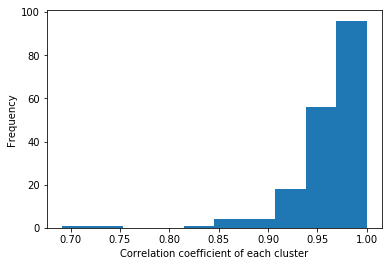

In [17]:
clust.cluster_dist()

In [18]:
from pyqsar import feature_selection_single as fss
select = fss.selection(X_data, y_data,
                       clust_info,
                       model='regression',
                       learning=10000,
                       bank=200,
                       component=4)

Start time :  16:26:49
Regression
1000 => 16:31:21 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
2000 => 16:35:52 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
3000 => 16:40:58 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
4000 => 16:45:58 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
5000 => 16:50:49 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
6000 => 16:55:35 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
7000 => 17:00:32 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
8000 => 17:05:37 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
9000 => 17:10:38 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
10000 => 17:15:29 [0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
[0.76196702035853, ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']]
Model's cluster info [371, 323, 169, 372]
Finish time :  17:15:29


In [19]:
select

['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']

In [20]:
from pyqsar import export_model as em
feature_set = select
mymodel = em.ModelExport(X_data,y_data, feature_set)

In [21]:
mymodel.features_table()

,AATS8e,AATS8m,MATS2m,nHBa,IC50
0,0.338277,0.000000,0.167096,0.000000,84.00
1,0.515585,0.099693,0.427757,0.333333,195.00
2,0.304412,0.114729,0.307795,0.000000,65.00
3,0.470090,0.197036,0.542343,0.333333,18.00
4,0.393634,0.255020,0.000000,0.000000,114.00
5,0.309330,0.070121,0.516998,0.333333,160.00
6,0.433676,0.209144,0.623134,0.333333,82.00
7,0.229835,0.010012,0.756870,0.666667,406.00
8,0.561028,0.209949,0.756870,0.666667,18.00
9,0.706885,0.285042,0.959915,1.000000,202.00


,AATS8e,AATS8m,MATS2m,nHBa,IC50
AATS8e,1.000000,0.333792,0.265694,0.770429,-0.322885
AATS8m,0.333792,1.000000,0.336778,0.437903,-0.490495
MATS2m,0.265694,0.336778,1.000000,0.640234,-0.319497
nHBa,0.770429,0.437903,0.640234,1.000000,-0.077545
IC50,-0.322885,-0.490495,-0.319497,-0.077545,1.000000


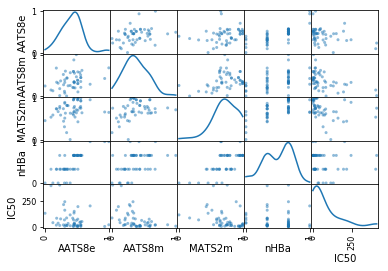

In [22]:
mymodel.model_corr()

In [23]:
mymodel.mlr()

Model features:  ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']
Coefficients:  [[-570.93927314 -229.58319132 -361.88493393  548.3248582 ]]
Intercept:  [385.55710223]
RMSE: 44.631630
R^2: 0.761967


C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:97: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.X_data.loc[:,self.feature_set].as_matrix()
C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = self.y_data.as_matrix()


C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = self.X_data.loc[:,self.feature_set].as_matrix()
C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\export_model.py:49: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = self.y_data.as_matrix()


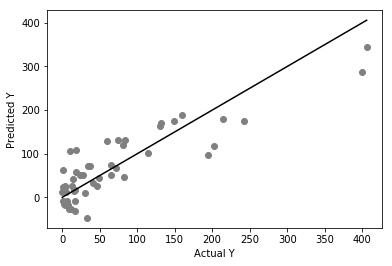

In [24]:
mymodel.train_plot()

C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\cross_validation.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x = X_data.loc[:,feature_set].as_matrix()
C:\Users\CBBL\Anaconda2\lib\site-packages\pyqsar\cross_validation.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y =y_data.as_matrix()


R^2CV mean: 0.766422
Q^2CV mean: 0.650532
RMSE CV : 50.0589
Features set = ['AATS8e', 'AATS8m', 'MATS2m', 'nHBa']
Model coeff =  [[-540.76697548 -225.64495115 -360.20177277  557.19577427]]
Model intercept =  [363.52062735]


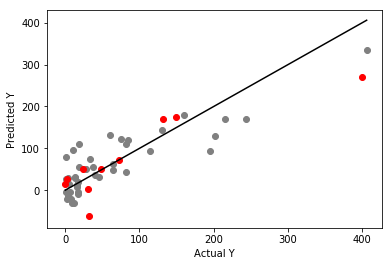

In [25]:
from pyqsar import cross_validation as cv
cv.k_fold(X_data, y_data, feature_set, k=5, run=100)